In [29]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

import pandas as pd
import numpy as np
import wget
import os

In [30]:
from datetime import datetime
print('Дата обновления этого ноутбука:')
print(datetime.today())

Дата обновления этого ноутбука:
2020-06-10 12:00:17.896694


# Избыточная смертность в Мск

In [31]:
msk_death = pd.read_excel('data-6267-2020-05-08.xlsx').set_index('ID')

In [33]:
month_list = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май']

In [34]:
msk_death.head()

,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalNumber,global_id
ID,,,,,,,,,,,,,
1,2010,Январь,9206.0,4785.0,4421.0,10430,4997.0,3302.0,1241.0,95.0,491.0,29762.0,37591658.0
2,2010,Февраль,9060.0,4656.0,4404.0,9573,4873.0,2937.0,1326.0,97.0,639.0,28505.0,37591659.0
3,2010,Март,10934.0,5630.0,5304.0,10528,3642.0,4361.0,1644.0,147.0,717.0,31973.0,37591660.0
4,2010,Апрель,10140.0,5278.0,4862.0,9501,9698.0,3943.0,1530.0,128.0,642.0,35572.0,37591661.0
5,2010,Май,9457.0,4825.0,4632.0,9482,3726.0,3554.0,1397.0,96.0,492.0,28204.0,37591662.0


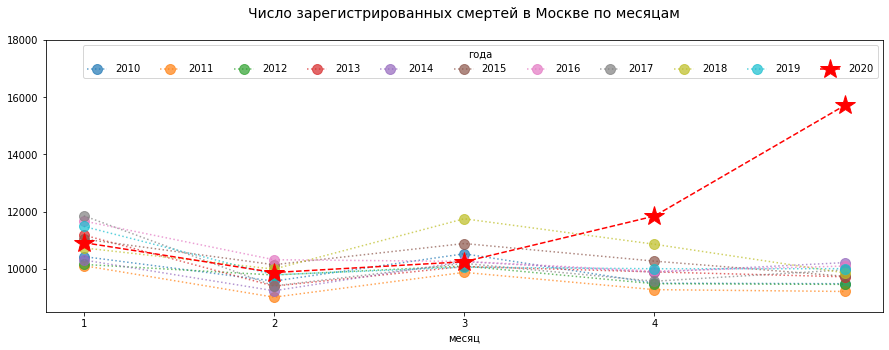

In [39]:
plt.figure(figsize=(15,5))
for year in range(2010, 2020):
    q = (msk_death['Year']==year)&(msk_death['Month'].isin(month_list))
    plt.plot(range(1, len(month_list)+1), msk_death[q]['StateRegistrationOfDeath'].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

q = (msk_death['Year']==2020)&(msk_death['Month'].isin(month_list))
plt.plot(range(1, len(month_list)+1), msk_death[q]['StateRegistrationOfDeath'].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')
plt.legend(ncol=11, title='года')
plt.xticks(range(1,5))
plt.xlabel('месяц')
plt.ylim(8500, 18000)
plt.title('Число зарегистрированных смертей в Москве по месяцам\n', fontsize=14)
plt.show()

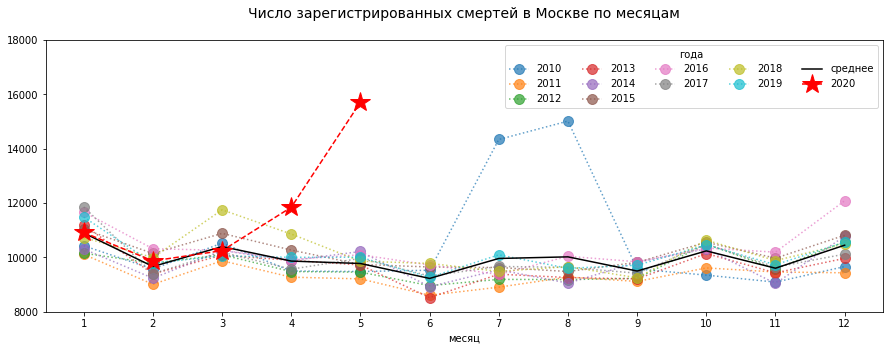

In [41]:
col = 'StateRegistrationOfDeath'
plt.figure(figsize=(15,5))
for year in range(2010, 2020):
    q = (msk_death['Year']==year)
    plt.plot(range(1, 13), msk_death[q][col].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

plt.plot(range(1, 13), 
         msk_death[~msk_death['Year'].isin([2020])].groupby('Month')[col].mean().reindex(msk_death['Month'].unique()), 
         label='среднее', color='black')
    
q = (msk_death['Year']==2020)
plt.plot(range(1, len(month_list)+1), msk_death[q][col].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')

plt.legend(ncol=5, title='года')
plt.xticks(range(1,13))
plt.xlabel('месяц')
plt.ylim(8000, 18000)
plt.title('Число зарегистрированных смертей в Москве по месяцам\n', fontsize=14)
plt.show()

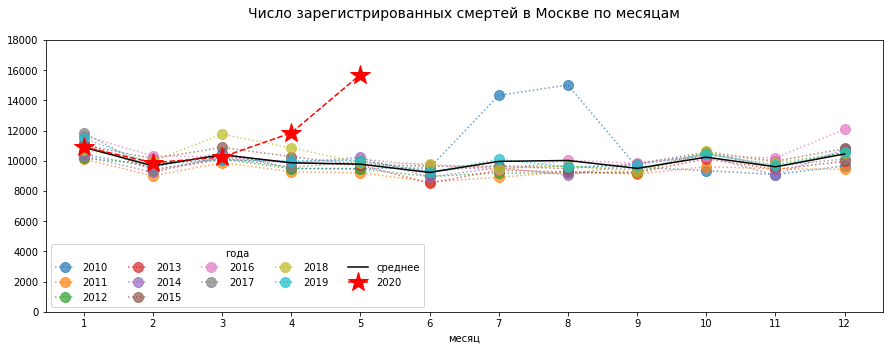

In [111]:
col = 'StateRegistrationOfDeath'
plt.figure(figsize=(15,5))
for year in range(2010, 2020):
    q = (msk_death['Year']==year)
    plt.plot(range(1, 13), msk_death[q][col].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

plt.plot(range(1, 13), 
         msk_death[~msk_death['Year'].isin([2020])].groupby('Month')[col].mean().reindex(msk_death['Month'].unique()), 
         label='среднее', color='black')
    
q = (msk_death['Year']==2020)
plt.plot(range(1, len(month_list)+1), msk_death[q][col].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')

plt.legend(ncol=5, title='года')
plt.xticks(range(1,13))
plt.xlabel('месяц')
plt.ylim(0, 18000)
plt.title('Число зарегистрированных смертей в Москве по месяцам\n', fontsize=14)
plt.show()

**Отклонение в смертности за май от среднего в этом месяце за предыдущие года**

In [42]:
mean_prev = msk_death[(~msk_death['Year'].isin([2020])&(msk_death['Month'].isin(['Май'])))][col].mean().round()

In [43]:
mean_2020 = msk_death[(msk_death['Year'].isin([2020])&(msk_death['Month'].isin(['Май'])))][col].mean().round()

In [44]:
mean_2020 - mean_prev

5936.0

In [45]:
mean_2020 / mean_prev

1.607139204254884

**Разница между сезоном гриппа и остальными месяцами**

In [12]:
flu_time = ['Декабрь', 'Январь', 'Февраль', 'Март']

death_in_flu_time = msk_death[(~msk_death['Year'].isin([2010, 2020])
                               &(msk_death['Month'].isin(flu_time)))][col].mean().round()
death_in_not_flu_time = msk_death[(~msk_death['Year'].isin([2010, 2020])
                                   &(~msk_death['Month'].isin(flu_time)))][col].mean().round()

In [13]:
death_in_flu_time / death_in_not_flu_time

1.0744724865535789

In [14]:
death_in_flu_time - death_in_not_flu_time

720.0

# Избыточная смертность в Санкт-Петербурге

In [15]:
spb_death = pd.read_excel('spb_all_death.xlsx').set_index('ID')
# http://www.kzags.gov.spb.ru/statistics/

In [16]:
spb_death.head(2)

,Year,Month,StateRegistrationOfBirth,NumberOfBirthCertificatesForBoys,NumberOfBirthCertificatesForGirls,StateRegistrationOfDeath,StateRegistrationOfMarriage,StateRegistrationOfDivorce,StateRegistrationOfPaternityExamination,StateRegistrationOfAdoption,StateRegistrationOfNameChange,TotalNumber,global_id
ID,,,,,,,,,,,,,
13,2011,Январь,NaN,NaN,NaN,5394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2011,Февраль,NaN,NaN,NaN,5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN


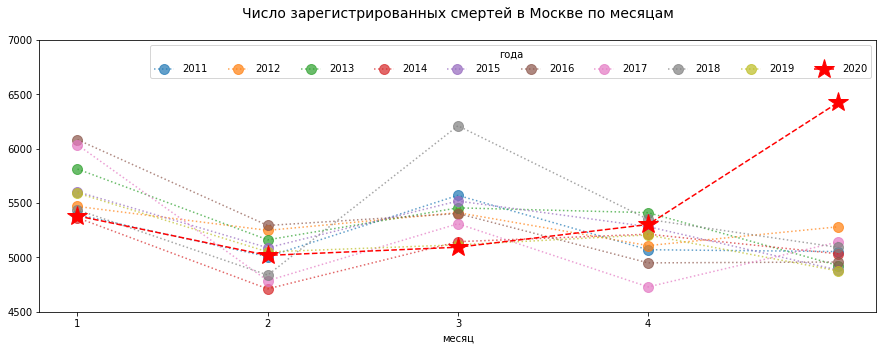

In [17]:
plt.figure(figsize=(15,5))
for year in range(2011, 2020):
    q = (spb_death['Year']==year)&(spb_death['Month'].isin(month_list+['Май']))
    plt.plot(range(1, 6), spb_death[q]['StateRegistrationOfDeath'].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

q = (spb_death['Year']==2020)&(spb_death['Month'].isin(month_list+['Май']))
plt.plot(range(1, 6), spb_death[q]['StateRegistrationOfDeath'].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')
plt.legend(ncol=11, title='года')
plt.xticks(range(1,5))
plt.xlabel('месяц')
plt.ylim(4500, 7000)
plt.title('Число зарегистрированных смертей в Санкт-Петербурге по месяцам\n', fontsize=14)
plt.show()

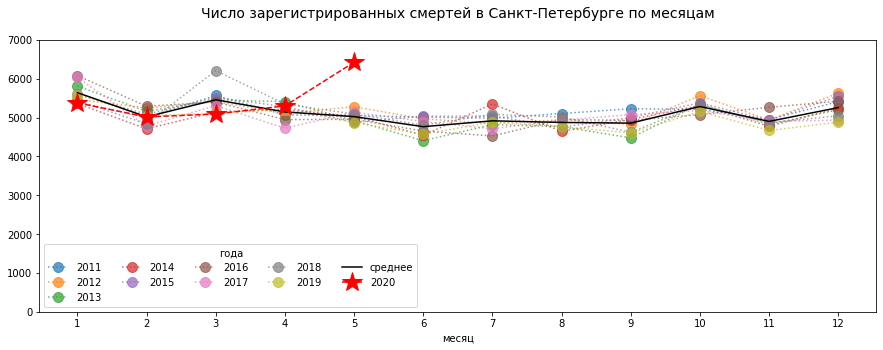

In [18]:
col = 'StateRegistrationOfDeath'
plt.figure(figsize=(15,5))
for year in range(2011, 2020):
    q = (spb_death['Year']==year)
    plt.plot(range(1, 13), spb_death[q][col].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

plt.plot(range(1, 13), 
         spb_death[~spb_death['Year'].isin([2020])].groupby('Month')[col].mean().reindex(spb_death['Month'].unique()), 
         label='среднее', color='black')
    
q = (spb_death['Year']==2020)
plt.plot(range(1, 6), spb_death[q][col].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')

plt.legend(ncol=5, title='года')
plt.xticks(range(1,13))
plt.xlabel('месяц')
plt.ylim(0, 7000)
plt.title('Число зарегистрированных смертей в Санкт-Петербурге по месяцам\n', fontsize=14)
plt.show()

**Отклонение в смертности за май от среднего в этом месяце за предыдущие года**

In [19]:
mean_prev = spb_death[(~spb_death['Year'].isin([2020])&(spb_death['Month'].isin(['Май'])))][col].mean().round()

In [20]:
mean_2020 = spb_death[(spb_death['Year'].isin([2020])&(spb_death['Month'].isin(['Май'])))][col].mean().round()

In [21]:
mean_2020

6427.0

In [22]:
mean_2020 - mean_prev

1400.0

In [23]:
mean_2020/mean_prev

1.2784961209468868

**...аналогично для марта 2018**

In [24]:
spb_death[(spb_death['Year'].isin([2018])&(spb_death['Month'].isin(['Март'])))][col].mean().round() / spb_death[(~spb_death['Year'].isin([2018, 2020])&(spb_death['Month'].isin(['Март'])))][col].mean().round()

1.1572573132103596

In [25]:
spb_death[(spb_death['Year'].isin([2018])&(spb_death['Month'].isin(['Март'])))][col].mean().round() - spb_death[(~spb_death['Year'].isin([2018, 2020])&(spb_death['Month'].isin(['Март'])))][col].mean().round()

844.0

**Разница между сезоном гриппа и остальными месяцами**

In [26]:
flu_time = ['Декабрь', 'Январь', 'Февраль', 'Март']

death_in_flu_time = spb_death[(~spb_death['Year'].isin([2020])&(spb_death['Month'].isin(flu_time)))][col].mean().round()
death_in_not_flu_time = spb_death[(~spb_death['Year'].isin([2020])&(~spb_death['Month'].isin(flu_time)))][col].mean().round()

In [27]:
death_in_flu_time / death_in_not_flu_time

1.0750050271465916

In [28]:
death_in_flu_time - death_in_not_flu_time

373.0

# Относительное колебание смертности

In [55]:
diff_msk = (msk_death[(msk_death['Year']==2020)&(msk_death['Month'].isin(month_list))].groupby('Month')[col].mean() 
    / msk_death[(msk_death['Year']!=2020)&(msk_death['Month'].isin(month_list))].groupby('Month')[col].mean()) * 100 - 100

In [57]:
diff_spb = (spb_death[(spb_death['Year']==2020)&(spb_death['Month'].isin(month_list))].groupby('Month')[col].mean() 
    / spb_death[(spb_death['Year']!=2020)&(spb_death['Month'].isin(month_list))].groupby('Month')[col].mean()) * 100 - 100

In [60]:
diff = diff_msk.to_frame().merge(diff_spb, left_index=True, right_index=True)
diff.columns = ['Москва', 'Санкт-Петербург']

In [63]:
diff = diff.reindex(month_list)

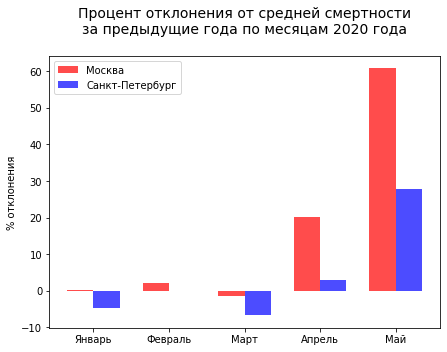

In [110]:
fig,ax = plt.subplots(figsize=(7,5))
                      
ind = np.arange(len(diff.index))  # the x locations for the groups
width = 0.35  # the width of the bars

plt.bar(ind - width/2, height=diff['Москва'], width=width, color='red', alpha=0.7, label='Москва')
plt.bar(ind + width/2, height=diff['Санкт-Петербург'], width=width, color='blue', alpha=0.7, label='Санкт-Петербург')
plt.ylabel('% отклонения')
ax.set_xticks(ind)
ax.set_xticklabels(diff.index)
plt.legend()
plt.title('Процент отклонения от средней смертности\nза предыдущие года по месяцам 2020 года\n', fontsize=14)
plt.show()

In [115]:
msk_death[(msk_death['Year']==2020)&(msk_death['Month'].isin(['Апрель', 'Май']))].groupby('Month')[col].sum().sum() / msk_death[(msk_death['Year']!=2020)&(msk_death['Month'].isin(['Апрель', 'Май']))].groupby('Month')[col].mean().sum()

1.4029720057220525

In [116]:
msk_death[(msk_death['Year']==2020)&(msk_death['Month'].isin(['Апрель', 'Май']))].groupby('Month')[col].sum().sum() - msk_death[(msk_death['Year']!=2020)&(msk_death['Month'].isin(['Апрель', 'Май']))].groupby('Month')[col].mean().sum()

7915.699999999997

# Избыточная смертность в Екб

In [119]:
ekb_death = pd.read_excel('ekb.xlsx')
# https://zags.midural.ru/article/show/id/222

In [127]:
month_list = ['январь', 'февраль', 'март', 'апрель', 'май']

In [128]:
ekb_death.columns = ['Year', 'Month', 'StateRegistrationOfBirth', 'StateRegistrationOfDeath', 
                    'браке', 'растор. брака', 'уст.отцовст.', 'усынов.(удоч.)', 'перемене имени',
                    'итого']

In [129]:
ekb_death.head()

,Year,Month,StateRegistrationOfBirth,StateRegistrationOfDeath,браке,растор. брака,уст.отцовст.,усынов.(удоч.),перемене имени,итого
0,2020,январь,3729,5203,1474,1568,669,32,191,12866
1,2020,февраль,3295,4487,2080,1485,600,25,201,12173
2,2020,март,3529,5114,1772,1563,630,24,191,12823
3,2020,апрель,3583,4561,1388,547,458,7,92,10636
4,2020,май,3360,4531,571,739,444,14,61,9720


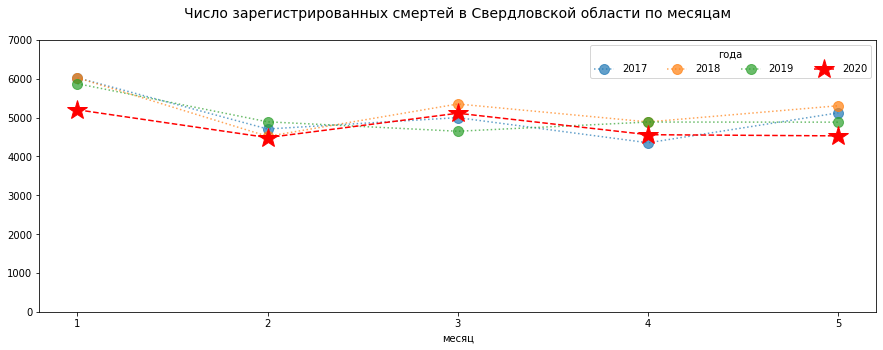

In [135]:
plt.figure(figsize=(15,5))
for year in range(2017, 2020):
    q = (ekb_death['Year']==year)&(ekb_death['Month'].isin(month_list))
    plt.plot(range(1, len(month_list)+1), ekb_death[q]['StateRegistrationOfDeath'].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

q = (ekb_death['Year']==2020)&(ekb_death['Month'].isin(month_list))
plt.plot(range(1, len(month_list)+1), ekb_death[q]['StateRegistrationOfDeath'].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')
plt.legend(ncol=11, title='года')
plt.xticks(range(1,6))
plt.xlabel('месяц')
plt.ylim(0, 7000)
plt.title('Число зарегистрированных смертей в Свердловской области по месяцам\n', fontsize=14)
plt.show()

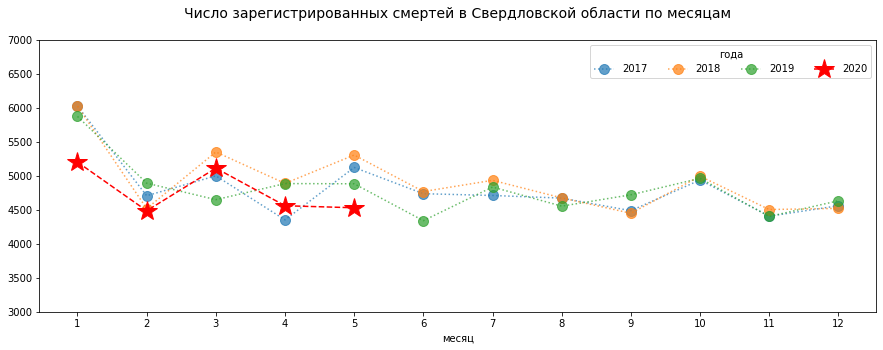

In [139]:
plt.figure(figsize=(15,5))
for year in range(2017, 2020):
    q = (ekb_death['Year']==year)
    plt.plot(range(1, 13), ekb_death[q]['StateRegistrationOfDeath'].values, label=year,
             marker='o', linestyle=':', markersize=10, alpha=0.7)

q = (ekb_death['Year']==2020)&(ekb_death['Month'].isin(month_list))
plt.plot(range(1, len(month_list)+1), ekb_death[q]['StateRegistrationOfDeath'].values, marker='*', 
         markersize=20, label='2020', color='red', linestyle='--')
plt.legend(ncol=11, title='года')
plt.xticks(range(1,13))
plt.xlabel('месяц')
plt.ylim(3000, 7000)
plt.title('Число зарегистрированных смертей в Свердловской области по месяцам\n', fontsize=14)
plt.show()

In [140]:
flu_time = ['декабрь', 'январь', 'февраль', 'март']

death_in_flu_time = ekb_death[(~ekb_death['Year'].isin([2020])&(ekb_death['Month'].isin(flu_time)))][col].mean().round()
death_in_not_flu_time = ekb_death[(~spb_death['Year'].isin([2020])&(~ekb_death['Month'].isin(flu_time)))][col].mean().round()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [141]:
death_in_flu_time / death_in_not_flu_time

1.0683544303797468